In [1]:
# gambling involvement + harm + demographic
library(tidyverse)

frequency_w1 = read.csv('../output/data_cleaned/freq_df_summary_2016_PCA.csv') %>% 
                dplyr::select(subjectkey,sum_freq_all_No_lottery) %>% 
                rename(frequency.score_w1 = sum_freq_all_No_lottery)

frequency_w2 = read.csv('../output/data_cleaned/freq_df_summary_2017_PCA.csv') %>% 
                dplyr::select(subjectkey,sum_freq_all_No_lottery) %>% 
                rename(frequency.score_w2 = sum_freq_all_No_lottery)

money_w1 = read.csv('../output/data_cleaned/wmy_expenses_df_2016.csv') %>% 
                dplyr::select(subjectkey,annual_expenses)%>%
                rename( annual.expenses_w1 = annual_expenses)

money_w2 = read.csv('../output/data_cleaned/wmy_expenses_df_2017.csv') %>% 
                dplyr::select(subjectkey,annual_expenses)%>%
                rename( annual.expenses_w2 = annual_expenses)

diversity_w1 = read.csv('../output/data_cleaned/width_df_summary_2016.csv') %>% 
                dplyr::select(subjectkey,diverity_No_lottery) %>%
                rename( diversity_w1 = diverity_No_lottery)

diversity_w2 = read.csv('../output/data_cleaned/width_df_summary_2017.csv') %>% 
                dplyr::select(subjectkey,diverity_No_lottery) %>%
                rename( diversity_w2 = diverity_No_lottery)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data_2016 = read.csv('../output/data_cleaned/HarmSurvey2016.csv')
harm_data = data_2016 %>% select(subjectkey, starts_with('h'))

harm_w1 =harm_data %>%  
                mutate(SGHS_18 = rowSums(select(.,
                                                hf_reduction_Available_money, hf_reduction_recreation_expenses, hf_reduction_Saving,
                                                hw_Used_job_time_gamble, hw_Reduced_performance, hw_Used_job_resources_gamble,
                                                hh_less_time_for_sleep, hh_Increased_tobacco, hh_Increased_depression,
                                                he_regrets, he_Felt_like_a_failure, he_ashamed,
                                                hr_less_close_time, hr_less_social_time, hr_greater_relation_tension,
                                                ho_Reduced_contribution_community, ho_outcast_community, ho_fake_promise_payback)) )%>% 
                select(subjectkey, SGHS_18) 

data_2017 = read.csv('../output/data_cleaned/HarmSurvey2017.csv')
harm_data = data_2017 %>% select(subjectkey, starts_with('h'))

harm_w2 =harm_data %>%  
                mutate(SGHS_18 = rowSums(select(.,
                                                hf_reduction_Available_money, hf_reduction_recreation_expenses, hf_reduction_Saving,
                                                hw_Used_job_time_gamble, hw_Reduced_performance, hw_Used_job_resources_gamble,
                                                hh_less_time_for_sleep, hh_Increased_tobacco, hh_Increased_depression,
                                                he_regrets, he_Felt_like_a_failure, he_ashamed,
                                                hr_less_close_time, hr_less_social_time, hr_greater_relation_tension,
                                                ho_Reduced_contribution_community, ho_outcast_community, ho_fake_promise_payback)) )%>% 
                select(subjectkey, SGHS_18) 


In [3]:
#demographic
data_2016_recode = read.csv('../output/data_cleaned/HarmSurvey2016_recode.csv')
demograph_data_w1 = data_2016_recode  %>% dplyr::select(demog_gender,demog_age_group, subjectkey) %>% tidyr::drop_na()  

In [4]:
# merge data
merged_df_w1 = list(frequency_w1, money_w1, diversity_w1, harm_w1, demograph_data_w1) %>% 
            reduce(full_join, by='subjectkey') %>% drop_na() %>% 
            mutate(demog_gender = factor(demog_gender), demog_age_group = factor(demog_age_group))


merged_df_w2 = list(frequency_w2, money_w2, diversity_w2, harm_w2, demograph_data_w1) %>% 
            reduce(full_join, by='subjectkey') %>% drop_na() %>% 
            mutate(demog_gender = factor(demog_gender), demog_age_group = factor(demog_age_group))

dim(merged_df_w1)
dim(merged_df_w2)
head(merged_df_w1, 2)

[1] 3970    7

[1] 1529    7

,subjectkey,frequency.score_w1,annual.expenses_w1,diversity_w1,SGHS_18,demog_gender,demog_age_group
,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,1,-0.6282489,100,2,0,Male,35~44
2,2,-0.3094462,780,2,0,Female,55~64


In [5]:
# factor scores of models
score_w1 = read.csv('../output/data_cleaned/model_scores_w1.csv') %>% select(-X)
score_w2 = read.csv('../output/data_cleaned/model_scores_w2.csv') %>% select(-X)

data_w1 = merge(merged_df_w1, score_w1, by.x = 'subjectkey', by.y = 'subjectkey_w1') 
data_w1$subjectkey = as.character(data_w1$subjectkey)
data_w1 = data_w1 %>% mutate(across(where(is.numeric), scale))

data_w2 = merge(merged_df_w2, score_w2, by.x = 'subjectkey', by.y = 'subjectkey_w2')
data_w2$subjectkey = as.character(data_w2$subjectkey)
data_w2 = data_w2 %>% mutate(across(where(is.numeric), scale))
dim(data_w1)
dim(data_w2)

[1] 2285   18

[1] 940  18

In [6]:
# regression
template =  data.frame(var = character(), 
                       beta = numeric(),
                       p_value = numeric(),
                       p_fdr = numeric())

frequency_result = template
expenses_result = template
diversity_result = template
harm_result = template

df_names = score_w1 %>% select(-subjectkey_w1)
all_vars = colnames(df_names)

# partial correlation after controlling for age and gender
n=0
for (the_var in all_vars){
    n = n + 1
    form  <- paste("frequency.score_w1 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w1)     
    frequency_result[n,'var'] <- the_var
    frequency_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    frequency_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    frequency_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("annual.expenses_w1 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w1)     
    expenses_result[n,'var'] <- the_var
    expenses_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    expenses_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    expenses_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("diversity_w1 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w1)     
    diversity_result[n,'var'] <- the_var
    diversity_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    diversity_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    diversity_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("SGHS_18 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w1)     
    harm_result[n,'var'] <- the_var
    harm_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    harm_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    harm_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
}

#FDR correction
frequency_result$p_fdr<- p.adjust(frequency_result$p_value, method = 'BH')
expenses_result$p_fdr<- p.adjust(expenses_result$p_value, method = 'BH')
diversity_result$p_fdr<- p.adjust(diversity_result$p_value, method = 'BH')
harm_result$p_fdr<- p.adjust(harm_result$p_value, method = 'BH')

frequency_result = frequency_result %>% mutate(criterion = 'gambling frequency')
expenses_result = expenses_result %>% mutate(criterion = 'annual expenses')
diversity_result = diversity_result %>% mutate(criterion = 'gambling diversity')
harm_result = harm_result %>% mutate(criterion = 'gambling harm')

df = rbind(frequency_result,expenses_result,diversity_result,harm_result) %>% mutate(time = 'wave1')
dim(df)
head(df, 2)

[1] 44  7

,var,beta,p_value,p_fdr,adj.r.squared,criterion,time
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,single.factor,0.2815141,1.381390e-45,1.688366e-45,0.1701261,gambling frequency,wave1
2,two.factor.f1,0.2826570,4.240167e-46,7.773640e-46,0.1709829,gambling frequency,wave1


In [7]:
# reshape dataframe
conv_val = df %>% select(var, beta, criterion) %>% pivot_wider(names_from = criterion, values_from = beta) 
conv_val[2:5] = round(conv_val[2:5],2)
conv_val

var,gambling frequency,annual expenses,gambling diversity,gambling harm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
single.factor,0.28,0.38,0.27,0.55
two.factor.f1,0.28,0.38,0.27,0.56
two.factor.f2,0.28,0.39,0.27,0.55
bifactor.f1,0.13,0.10,0.06,0.21
bifactor.f2,0.17,0.25,0.18,0.27
bifactor.g,0.29,0.40,0.27,0.61
two.factor.re.f1,0.29,0.39,0.27,0.56
two.factor.re.f2,0.29,0.39,0.28,0.55
three.factor.f1,0.28,0.38,0.27,0.56


# wave 2

In [8]:
template =  data.frame(var = character(), 
                       beta = numeric(),
                       p_value = numeric(),
                       p_fdr = numeric())

frequency_result = template
expenses_result = template
diversity_result = template
harm_result = template

df_names = score_w2 %>% select(-subjectkey_w2)
all_vars = colnames(df_names)

# partial correlation after controlling for age and gender
n=0
for (the_var in all_vars){
    n = n + 1
    form  <- paste("frequency.score_w2 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w2)     
    frequency_result[n,'var'] <- the_var
    frequency_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    frequency_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    frequency_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("annual.expenses_w2 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w2)     
    expenses_result[n,'var'] <- the_var
    expenses_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    expenses_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    expenses_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("diversity_w2 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w2)     
    diversity_result[n,'var'] <- the_var
    diversity_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    diversity_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    diversity_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
    
    form  <- paste("SGHS_18 ~ ", the_var, " + demog_gender + demog_age_group")
    m0 <- lm(form, data = data_w2)     
    harm_result[n,'var'] <- the_var
    harm_result[n,'beta'] <- coef(summary(m0))[the_var,'Estimate']
    harm_result[n,'p_value'] <- coef(summary(m0))[the_var,'Pr(>|t|)']  
    harm_result[n,'adj.r.squared'] <- summary(m0)$adj.r.squared
}

#FDR correction
frequency_result$p_fdr<- p.adjust(frequency_result$p_value, method = 'BH')
expenses_result$p_fdr<- p.adjust(expenses_result$p_value, method = 'BH')
diversity_result$p_fdr<- p.adjust(diversity_result$p_value, method = 'BH')
harm_result$p_fdr<- p.adjust(harm_result$p_value, method = 'BH')

frequency_result = frequency_result %>% mutate(criterion = 'gambling frequency')
expenses_result = expenses_result %>% mutate(criterion = 'annual expenses')
diversity_result = diversity_result %>% mutate(criterion = 'gambling diversity')
harm_result = harm_result %>% mutate(criterion = 'gambling harm')

df_2 = rbind(frequency_result,expenses_result,diversity_result,harm_result) %>% mutate(time = 'wave2')
dim(df_2)
head(df_2, 2)

[1] 44  7

,var,beta,p_value,p_fdr,adj.r.squared,criterion,time
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,single.factor,0.09741772,0.002878915,0.004524009,0.004883711,gambling frequency,wave2
2,two.factor.f1,0.10175045,0.001845248,0.004524009,0.005754688,gambling frequency,wave2


In [9]:
# reshape dataframe
conv_val_2 = df_2 %>% select(var, beta, criterion) %>% pivot_wider(names_from = criterion, values_from = beta) 
conv_val_2[2:5] = round(conv_val_2[2:5],2)
conv_val_2

var,gambling frequency,annual expenses,gambling diversity,gambling harm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
single.factor,0.10,0.36,0.23,0.53
two.factor.f1,0.10,0.37,0.22,0.54
two.factor.f2,0.09,0.38,0.23,0.53
bifactor.f1,0.06,0.10,0.10,0.37
bifactor.f2,0.08,0.36,0.22,0.42
bifactor.g,0.11,0.38,0.24,0.59
two.factor.re.f1,0.11,0.36,0.23,0.55
two.factor.re.f2,0.10,0.38,0.24,0.53
three.factor.f1,0.10,0.37,0.22,0.54


In [10]:
convergent_validity = merge(conv_val, conv_val_2, by = 'var', suffixes = c("_w1","_w2"))

convergent_validity$table_order = c(7,8,6,1,9,10,11,2,3,4,5)
convergent_validity = convergent_validity %>% arrange(table_order)
write.csv(convergent_validity, '../output/tables/validity/convergent_validity_table.csv')
convergent_validity

var,gambling frequency_w1,annual expenses_w1,gambling diversity_w1,gambling harm_w1,gambling frequency_w2,annual expenses_w2,gambling diversity_w2,gambling harm_w2,table_order
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
single.factor,0.28,0.38,0.27,0.55,0.10,0.36,0.23,0.53,1
two.factor.f1,0.28,0.38,0.27,0.56,0.10,0.37,0.22,0.54,2
two.factor.f2,0.28,0.39,0.27,0.55,0.09,0.38,0.23,0.53,3
two.factor.re.f1,0.29,0.39,0.27,0.56,0.11,0.36,0.23,0.55,4
two.factor.re.f2,0.29,0.39,0.28,0.55,0.10,0.38,0.24,0.53,5
bifactor.g,0.29,0.40,0.27,0.61,0.11,0.38,0.24,0.59,6
bifactor.f1,0.13,0.10,0.06,0.21,0.06,0.10,0.10,0.37,7
bifactor.f2,0.17,0.25,0.18,0.27,0.08,0.36,0.22,0.42,8
three.factor.f1,0.28,0.38,0.27,0.56,0.10,0.37,0.22,0.54,9


Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



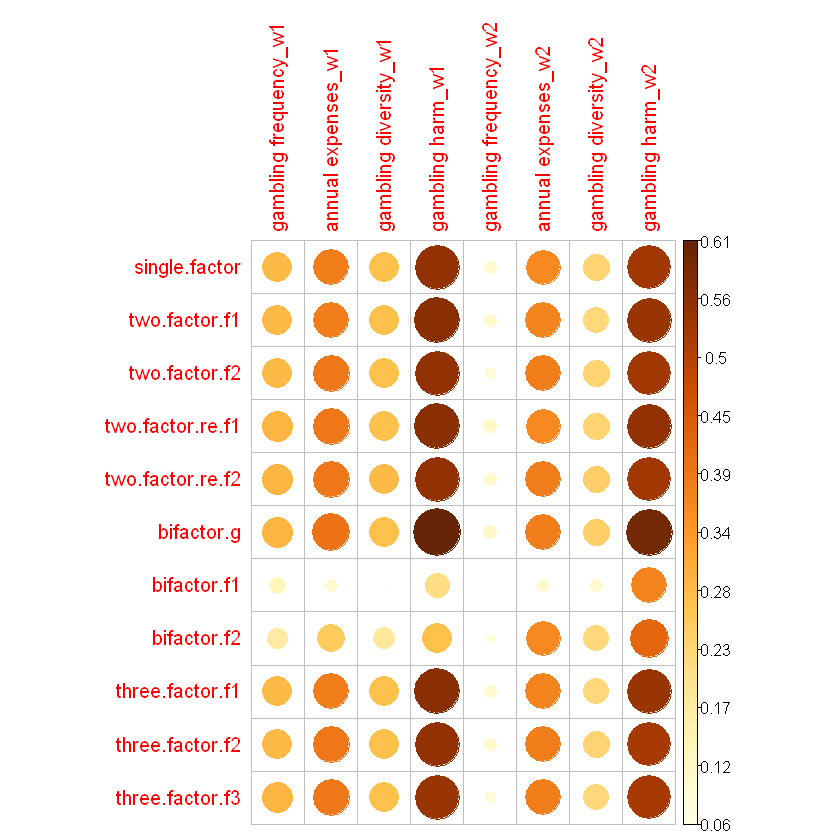

In [11]:
library(corrplot)
df_plot = convergent_validity %>% select(-table_order) %>% tibble::column_to_rownames('var')
corrplot(as.matrix(df_plot), is.corr = FALSE)